## 2. Using telco_churn database, predict total charges

#### Prepare the Environment 
(do not copy and paste...manually type so that you remember what you need and why you are importing the things that you are. You will do this often!)

In [1]:
# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid", color_codes=True)
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.feature_selection import f_regression

Export the table to a csv

In [2]:
path = '/Users/Dad/Desktop/python-exercises/'
df = pd.read_csv(path + "telco_churn.csv")

In [3]:
df.head()

,customer_id,tenure,monthly_charges,total_charges,contract_type
0,0013-SMEOE,71,109.70,7904.25,Two year
1,0014-BMAQU,63,84.65,5377.8,Two year
2,0016-QLJIS,65,90.45,5957.9,Two year
3,0017-DINOC,54,45.20,2460.55,Two year
4,0017-IUDMW,72,116.80,8456.75,Two year


Fill any missing values with 0

In [53]:
df = df.fillna(0)
df.isnull().sum()

customer_id        0
tenure             0
monthly_charges    0
total_charges      0
contract_type      0
dtype: int64

In [54]:
# df['total_charges'] = df.total_charges.replace(np.NaN, 0)

How many rows are in your dataframe?

In [4]:
print('rows =', df.shape[0])

rows = 1695


In [55]:
df.describe()

,tenure,monthly_charges,total_charges
count,1695.000000,1695.000000,1695.000000
mean,56.735103,60.770413,3706.934336
std,18.209363,34.678865,2579.517834
min,0.000000,18.400000,0.000000
25%,48.000000,24.025000,1269.675000
50%,64.000000,64.350000,3593.800000
75%,71.000000,90.450000,5988.800000
max,72.000000,118.750000,8672.450000


What is the data type of the field containing the customer ids?

In [56]:
df['customer_id'].dtypes

dtype('O')

What is the inner quartile range of tenure? monthly charges? total charges?

In [58]:
IQR = df.tenure.quantile(.75) - df.tenure.quantile(.25)
print('Tenure IQR =',{IQR})

Tenure IQR = {23.0}


In [59]:
IQR_T = stats.iqr(df.tenure)
Range_T = df.tenure.max() - df.tenure.min()

print(f'Tenure IQR: {IQR_T}'.format())
print(f'Tenure Range: {Range_T}'.format())

Tenure IQR: 23.0
Tenure Range: 72.0


In [60]:
IQR_MC = stats.iqr(df.monthly_charges)
Range_MC = df.monthly_charges.max() - df.monthly_charges.min()

print(f'Monthly Charges IQR: {IQR_MC}'.format())
print(f'Monthly Charges Range: {Range_MC}'.format())

Monthly Charges IQR: 66.42500000000001
Monthly Charges Range: 100.35


In [61]:
IQR_TC = stats.iqr(df.total_charges)
Range_TC = df.total_charges.max() - df.total_charges.min()

print(f'Total Charges IQR: {IQR_TC}'.format())
print(f'Total Charges Range: {Range_TC}'.format())

Total Charges IQR: 4719.125
Total Charges Range: 8672.45


How many missing values are in each variable?

In [6]:
df.isnull().sum()

customer_id        0
tenure             0
monthly_charges    0
total_charges      0
contract_type      0
dtype: int64

Print to the notebook the last 10 rows of your dataframe.

In [62]:
df.tail(10)

,customer_id,tenure,monthly_charges,total_charges,contract_type
1685,9945-PSVIP,25.0,18.70,383.65,Two year
1686,9950-MTGYX,28.0,20.30,487.95,Two year
1687,9953-ZMKSM,63.0,25.25,1559.30,Two year
1688,9958-MEKUC,72.0,103.95,7517.70,Two year
1689,9959-WOFKT,71.0,106.70,7382.25,Two year
1690,9964-WBQDJ,71.0,24.40,1725.40,Two year
1691,9972-EWRJS,67.0,19.25,1372.90,Two year
1692,9975-GPKZU,46.0,19.75,856.50,Two year
1693,9993-LHIEB,67.0,67.85,4627.65,Two year
1694,9995-HOTOH,63.0,59.00,3707.60,Two year


Show the ditribution of monthly charges through a histogram

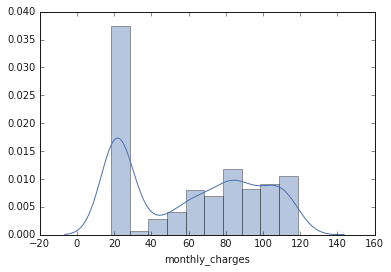

In [64]:
sns.distplot(df.monthly_charges)

Create a box plot of each variable in your new dataframe. 

This should be a single chart with 3 categorical plots, 1 each for tenure, monthly charges, total charges.

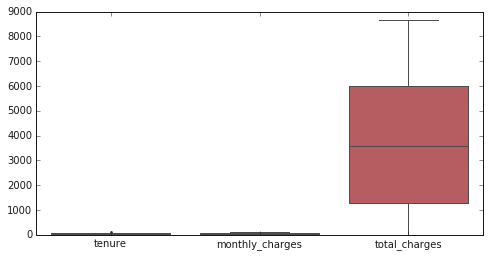

In [93]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=['customer_id']))

Split your data into a test and train dataset. 

Set the random_state to 123. 

You should end up with 4 dataframes: X_train, X_test, y_train, y_test.

In [96]:
X = df.drop(['total_charges','customer_id'], axis=1)
y = df[['total_charges']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

## 3. Using the in-sample data (X_train and y_train)

Create a scatterplot for each combination of variables.

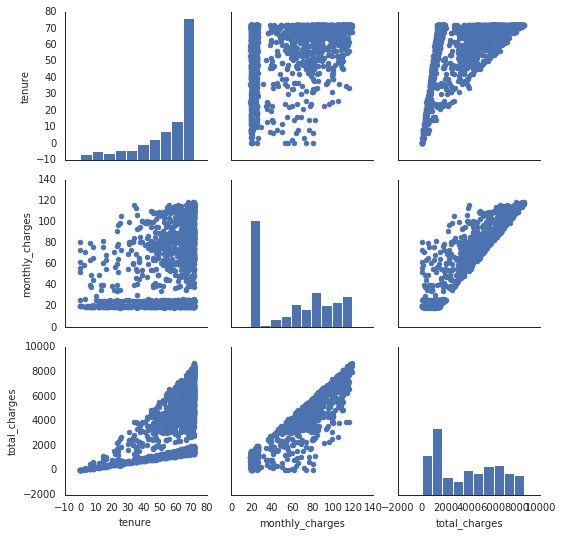

In [97]:
with sns.axes_style('white'):
    g = sns.PairGrid(train)
    g.map_diag(plt.hist)
    g.map_offdiag(plt.scatter);

Create a heatmap containing the 3 variables.

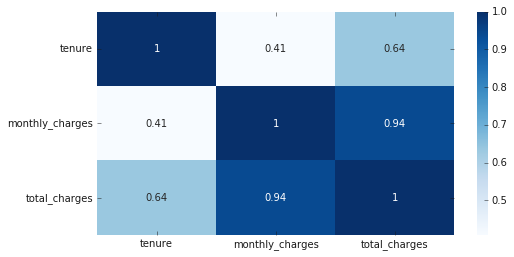

In [71]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

Compute pearson's correlation coefficient and print it's value in the sentence "Pearson's R is with a significance p-value of "

In [72]:
stats.pearsonr(df.monthly_charges, df.total_charges)

(0.9418038922762754, 0.0)

In [73]:
stats.pearsonr(df.tenure, df.total_charges)

(0.6355631513016043, 1.8478127591140834e-192)

Train (aka fit) a linear regression model, modeling total charges as a linear function of tenure.

In [74]:
lm1 = LinearRegression(fit_intercept=False)

What is the y-intercept of the regression line? Translate the intercept in plain english, i.e. what is means in the context of the data.

What the slope of the regression line? Translate the slope in plain english, i.e. what is means in the context of the data.

Write the linear function in the form of y = mx + b using the parameters that were estimated from the algorithm and the variable names for y and x specific to your data.

In [75]:
lm1.fit(X_train[['tenure']], y_train)
lm1_y_intercept = lm1.intercept_
lm1_coefficients = lm1.coef_

In [76]:
print('Univariate - total_charges = b + m * tenure')
print('    y-intercept (b): %.2f' % lm1_y_intercept)
print('    coefficient (m): %.2f' % lm1_coefficients[0])
print()

Univariate - total_charges = b + m * tenure
    y-intercept (b): 0.00
    coefficient (m): 67.82



Test your model on the training sample. That is, use your newly fit model to predict the total charges using tenure.

In [79]:
y_pred_lm1 = lm1.predict(X_train[['tenure']])

Evaluate the model's performance using r-squared, mean squared error, and median absolute error

In [81]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1))

lm1
  mse: 4.21e+06


In [82]:
mae_lm1 = median_absolute_error(y_train, y_pred_lm1)
print("lm1\n  mae: {:.3}".format(mse_lm1))

lm1
  mae: 4.21e+06


In [83]:
r2_lm1 = r2_score(y_train, y_pred_lm1)
print("lm1\n  r2: {:.3}".format(r2_lm1))

lm1
  r2: 0.375


## 4. Using the out-of-sample data (X_test, y_test)
Test your model on the test sample.

In [85]:
y_pred_lm1 = lm1.predict(X_test[['tenure']])

Evaluate your model's performance on test sample. How do each of the metrics compare to that of the training sample? How can you explain the reason for the difference?

In [86]:
mse = mean_squared_error(y_test, y_pred_lm1)
print("Mean squared error: %.2f" % mse)

Mean squared error: 3881232.75


Calculate the p-value of the regressor for the train and test sample. Hint: f_regression

In [98]:
f_regression(X_test[['tenure']],y_test)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([231.6718391]), array([3.48651193e-40]))

Create a scatter plot of the predicted values versus the actual values in the test sample

Text(0.5, 1.0, 'Predicted vs Actual Total Charges')

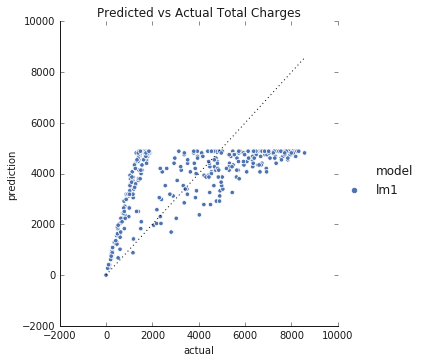

In [89]:
pd.DataFrame({'actual': y_test.total_charges,
              'lm1': y_pred_lm1.ravel(),})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([0, 8564.57], [0, 8564.57], c='black', ls=':')
plt.title('Predicted vs Actual Total Charges')

Create a scatter plot of the actual values of x and y in the test sample with the regression line layered over.

Text(0.5, 1.0, 'Actual values of x vs Actual values of y')

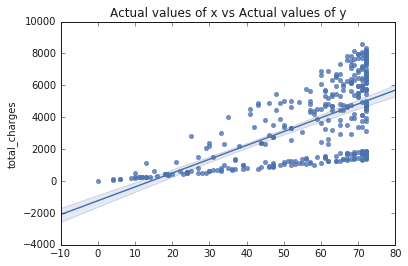

In [91]:
sns.regplot(X_test[['tenure']], y_test.total_charges, data=df);
plt.title('Actual values of x vs Actual values of y')

Create a scatter plot of the residuals (x axis: predicted values of final grade, y axis: the residual values (remember definition of residual from previous lesson). Layer over it a horizonal line that represents no residual.

Text(0, 0.5, 'Residuals')

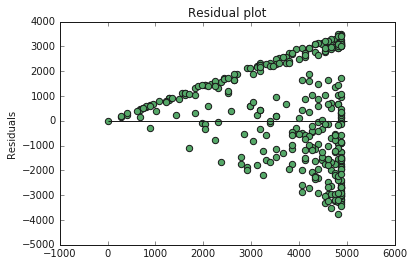

In [92]:
plt.scatter(y_pred_lm1, y_pred_lm1 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=5000)
plt.title("Residual plot")
plt.ylabel('Residuals')